# Session 2: Speed-up your code by vectorization

Date: 09/18/2017, Monday

This session is mostly about reviewing Lecture 4 and 5. This page just introduces an additional trick to make your code faster and cleaner.

## For loops
You already know how to create a Mandelbrot set by writting tons of "for" loops. If not, see Lecture 5's note.

In [1]:
%%file mande_by_loops.m
function Z_final = mande_by_loops(C, T)

    [nx,ny] = size(C);
    Z_final = zeros(nx,ny); % to hold last value of z, at all possible points.
    
    for ix = 1:nx
    for iy = 1:ny

        % get the value of c at current point.
        % note that MATLAB is case-sensitive
        c = C(ix,iy);
        z = 0; % initial value, doesn't matter too much
        for t=2:T
            z = z^2+c;
        end
        Z_final(ix,iy) = z; % save the last value of z

    end
    end

end

Created file '/Users/zhuangjw/Research/Computing/personal_web/AM111/docs/mande_by_loops.m'.


## Vectorization
The above function has 3 "for" loops, but 2 of them are not necessary, because you can operate on the entire array.

In [2]:
%%file mande_by_vec.m
function Z = mande_by_vec(C, T)
    % vectorized over C and Z

    [nx,ny] = size(C);
    Z = zeros(nx,ny);
    for t=2:T
        Z = Z.^2+C;
    end

end

Created file '/Users/zhuangjw/Research/Computing/personal_web/AM111/docs/mande_by_vec.m'.


## Performance comparision

Compared to the for-loop version, this vectorized version is much shorter, and 20x faster!

Elapsed time is 4.883975 seconds.
Elapsed time is 0.255324 seconds.

ans =

  logical

   1



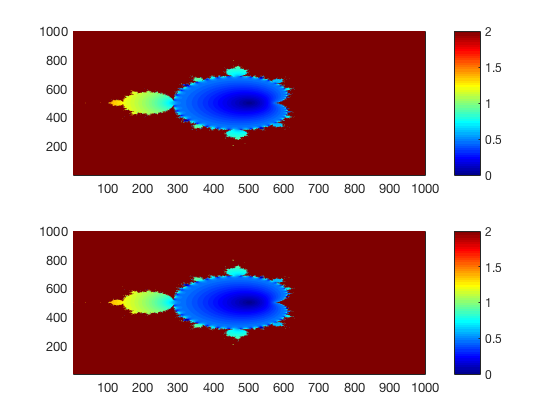

In [3]:
% initialization
nx = 1000;
xm = 1.75;
x = linspace(-xm, xm, nx);
y = linspace(-xm, xm, nx);
[Cr, Ci] = meshgrid(x,y);
C = Cr + i*Ci;

T = 50;

% use loops
tic
Z_loop = mande_by_loops(C,T);
toc

% use vectorization
tic
Z_vec = mande_by_vec(C,T);
toc

% check if results are equal
isequal(Z_vec,Z_loop)

% plot two results
subplot(211);pcolor(abs(Z_loop));
shading flat;colormap jet; colorbar;caxis([0,2]);

subplot(212);pcolor(abs(Z_vec));
shading flat;colormap jet; colorbar;caxis([0,2]);

MATLAB's loop is notoriously slow because it keeps checking the variable types at every iteration. A rule of thumb is **shorter code is often faster**, in terms of achieving the same functionality. ( Only for high-level languages like MATLAB and Python. Loop is fast in low-level languages.)